In [ ]:
!pip install scikit-plot

In [ ]:

import pandas as pd
import numpy as np
import gdown
import os

#Get the EEG spectrograms zip file and unzip it
eeg_image_directory = '/content/eeg_sz_spectrograms'
gdown.download('https://drive.google.com/uc?id=1WZ1yIFE2bng0McnY_4UBJHqTttsXTTNX', '{}.zip'.format(eeg_image_directory), quiet=False) 
!unzip -qq {eeg_image_directory}.zip -d {eeg_image_directory}

# rename 
dl_link = '/content/eeg_sz_spectrograms/gen_data_20s_70pct_overlap_-_high_nfft_all_channels_sml/'
!mv "{dl_link}/hc" {eeg_image_directory}
!mv "{dl_link}/sz" {eeg_image_directory}

Downloading...
From: https://drive.google.com/uc?id=1WZ1yIFE2bng0McnY_4UBJHqTttsXTTNX
To: /content/eeg_sz_spectrograms.zip
44.2MB [00:00, 259MB/s]


In [ ]:
# create train and test sets
# Use EEG of Sz for testing
# Extract files from an eeg_grp2 spectrogram directory where files are saved by subject

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

from shutil import copyfile
import os 

rand_seed = 1

#grp1_file_ids = [f for f in os.listdir(images_directory) if f.startswith(selected_groups[0])] 
#grp2_file_ids = [f for f in os.listdir(images_directory) if f.startswith(selected_groups[1])] 
ignore_list = ['h09', 'h10', 's10', 's11', 's12']
hc_subject_ids = ['hc' + str(i) for i in range(14) if "h{:02}".format(i) not in ignore_list] 
sz_subject_ids = ['sz' + str(i) for i in range(14) if "s{:02}".format(i) not in ignore_list] 

train_grp1, test_grp1 = train_test_split(hc_subject_ids, test_size=0.2, random_state=rand_seed)
train_grp2, test_grp2 = train_test_split(sz_subject_ids, test_size=0.2, random_state=rand_seed)

#train_grp1, validate_grp1 = train_test_split(grp1_file_ids, test_size=0.2, random_state=rand_seed)
#train_grp2, validate_grp2 = train_test_split(grp2_file_ids, test_size=0.2, random_state=rand_seed)
train_grp1, validate_grp1 = train_test_split(train_grp1, test_size=0.25, random_state=rand_seed)
train_grp2, validate_grp2 = train_test_split(train_grp2, test_size=0.25, random_state=rand_seed)

train_ids = np.concatenate([train_grp1, train_grp2])
validate_ids = np.concatenate([validate_grp1, validate_grp2])
test_ids = np.concatenate([test_grp1, test_grp2])
  



    
    
def gen_csv_and_copy_sz_files(image_dir, img_output_dir, participant_ids):
    subdir_data = []
    for group in ['hc', 'sz']: #['Healthy_Control', 'Sz_Patient']:
        for pid in os.listdir(image_dir + '/' + group): # by participant IDs
            if pid in participant_ids:
              for file in os.listdir(image_dir + '/' + group + '/' + pid):
                file_data = {'filename': file, 'label': group}
                subdir_data.append(file_data)
                copyfile(image_dir + '/' + group + '/' + pid + '/' + file, img_output_dir + '/' + group + '/' + file )
    return pd.DataFrame(subdir_data)


train_directory = 'all_train_images'
test_directory = 'all_test_images'
val_directory = 'all_validation_images'
all_images_directory = '/content/eeg_sz_spectrograms'
groups = ['hc', 'sz']
train_dirs = [train_directory, test_directory, val_directory]

for dir in train_dirs:
  for group in groups:
    output_group_dir = dir + '/' + group
    if not os.path.exists(output_group_dir):
      os.makedirs(output_group_dir)


train_df = gen_csv_and_copy_sz_files(image_dir=all_images_directory, 
                                img_output_dir=train_directory, participant_ids=train_ids)
test_df = gen_csv_and_copy_sz_files(image_dir=all_images_directory, 
                                img_output_dir=test_directory, participant_ids=validate_ids)
validation_df = gen_csv_and_copy_sz_files(image_dir=all_images_directory, 
                                img_output_dir=val_directory, participant_ids=test_ids)
print(test_df.head())



     filename label
0  hc6_56.png    hc
1   hc6_2.png    hc
2  hc6_39.png    hc
3  hc6_49.png    hc
4  hc6_46.png    hc


In [ ]:
train_df['label'].unique()

array(['hc', 'sz'], dtype=object)

In [ ]:
%cd /content

#!git clone https://github.com/zhangrong1722/CheXNet-Pytorch.git binaryCNN

gdown.download('https://drive.google.com/uc?id=1TKqBlg7bzFV9kljftUgJVmiDcyXSxJ-Y', 'main.py', quiet=False) 

train_directory = '/content/all_train_images'
test_directory = '/content/all_test_images'
validation_directory = '/content/all_validation_images'


/content


Downloading...
From: https://drive.google.com/uc?id=1TKqBlg7bzFV9kljftUgJVmiDcyXSxJ-Y
To: /content/main.py
100%|██████████| 16.1k/16.1k [00:00<00:00, 10.3MB/s]


In [ ]:

import timeit
import math
start = timeit.default_timer()

!python main.py  --train_dir {train_directory}  --validation_dir {validation_directory}  --test_dir {test_directory} --epochs 400

stop = timeit.default_timer()
hrs = math.floor((stop - start)/60/60)
minutes =((stop - start)/60) -hrs*60 
print('\n\nExecution time: {} hrs {} minutes'.format(hrs, minutes ))

Streaming output truncated to the last 5000 lines.
Train Epoch: 88 [720/972 (73%)]	Loss: 0.000000
Train Epoch: 88 [840/972 (86%)]	Loss: 0.000000
Train Epoch: 88 [960/972 (98%)]	Loss: 0.000000
Training Loss: 0.0001 Acc: 100.0000
length of validation loader:  49

Validation set: Average loss: 1.5120, Accuracy: 243/486 (50.000%)

Epoch 89/400
----------
Train Epoch: 89 [0/972 (0%)]	Loss: 0.000000
Train Epoch: 89 [120/972 (12%)]	Loss: 0.000000
Train Epoch: 89 [240/972 (24%)]	Loss: 0.000000
Train Epoch: 89 [360/972 (37%)]	Loss: 0.000000
Train Epoch: 89 [480/972 (49%)]	Loss: 0.000000
Train Epoch: 89 [600/972 (61%)]	Loss: 0.000000
Train Epoch: 89 [720/972 (73%)]	Loss: 0.000000
Train Epoch: 89 [840/972 (86%)]	Loss: 0.000000
Train Epoch: 89 [960/972 (98%)]	Loss: 0.000000
Training Loss: 0.0000 Acc: 100.0000
length of validation loader:  49

Validation set: Average loss: 1.5008, Accuracy: 243/486 (50.000%)

Epoch 90/400
----------
Train Epoch: 90 [0/972 (0%)]	Loss: 0.000000
Train Epoch: 90 [120/9

In [ ]:
import matplotlib.pyplot as plt
import itertools

# modified from main.py https://github.com/zhangrong1722/CheXNet-Pytorch

def plt_roc(test_y, probas_y, plot_micro=False, plot_macro=False):
    assert isinstance(test_y, list) and isinstance(probas_y, list), 'the type of input must be list'
    skplt.metrics.plot_roc(test_y, probas_y, plot_micro=plot_micro, plot_macro=plot_macro)
    plt.savefig('roc_auc_curve.png')
    plt.show()
    plt.close()


###########################################
# Define confusion matrix and ROC visualization functions
# from https://colab.research.google.com/drive/1ISfhxFDntfOos7cOeT7swduSqzLEqyFn#scrollTo=UiKRYOWPfhJs

def plot_confusion_matrix(cm, classes=None,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues,
                          cv=10):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
   
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("\nNormalized confusion matrix")
    else:
        print('\nConfusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    if classes:
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 1.5
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.locator_params(nbins=2)

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

In [ ]:
best_model_preds = pd.read_csv('best_val_model_predictions.csv')
pred_y = best_model_preds['pred_y'].values
test_y = best_model_preds['test_y'].values
probas_y = [s.replace('[', '').replace(']', '').split(', ') for s in best_model_preds['probas_y'].values]
probas_y = [[float(t[0]), float(t[1])] for t in probas_y]


Confusion matrix, without normalization


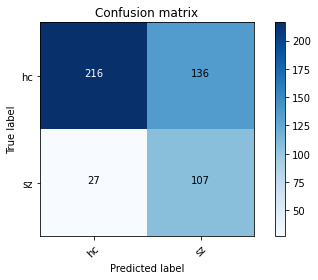

In [ ]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(pred_y, test_y)
plot_confusion_matrix(confusion,
                      classes=['hc', 'sz'],
                      title='Confusion matrix')


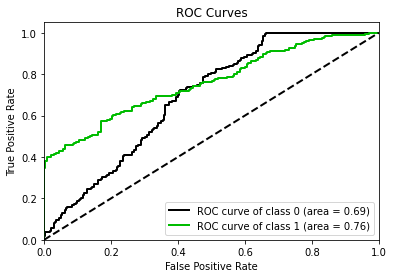

In [ ]:
!pip install scikit_plot
import scikitplot as skplt

plt_roc(list(test_y), list(probas_y))

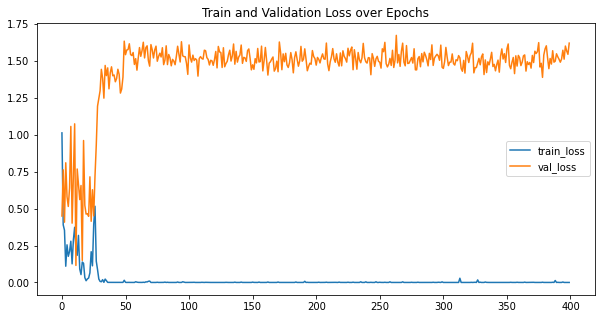

In [ ]:
metrics = pd.read_csv('metrics_by_epoch.csv')
metrics.head()
#TODO chart these values

metrics[['train_loss', 'val_loss']].plot(figsize=(10,5), title='Train and Validation Loss over Epochs')

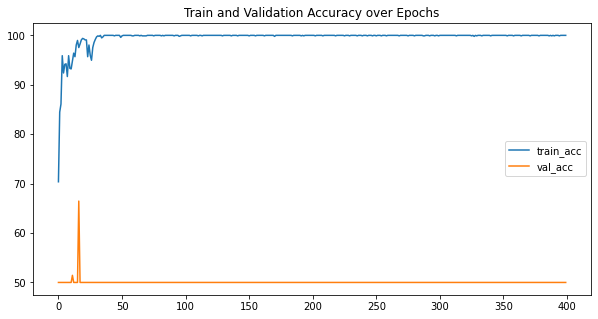

In [ ]:
metrics[['train_acc', 'val_acc']].plot(figsize=(10,5), title='Train and Validation Accuracy over Epochs')

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

auc = roc_auc_score(test_y, pred_y)
print('AUC score for validation set: ', auc)


f1_macro = f1_score(test_y, pred_y, average='macro')
f1_micro = f1_score(test_y, pred_y, average='micro')

print('F1 score (average=macro): {}     F1 score (average=micro): {}'.format(f1_macro, f1_micro))


AUC score for validation set:  0.6646090534979423
F1 score (average=macro): 0.6468448387312484     F1 score (average=micro): 0.6646090534979424
